# Vicsek Model
###### Rebecca Crossley(1708811), Yulin Zhang, Shancheng Wang & Katy Fellingham

This research concerns models of flocking in birds, as initially proposed by Tamas Vicsek in ____. 

In this, we model each bird as a weightless point particle moving with an initial constant velocity of $v_0$ along a polar direction $\hat{n}=(cos \theta,sin \theta)$. Then, in order to create a swarming behaviour, the birds check in at each discrete time step with all of its neighbours within a radius $R$ and reorientate themselves along the mean direction of all birds within the region. Since birds are imperfect creatures, we take account for this by including a random normally distributed noise term, $\eta_i$, with mean 0 and variance $\sigma$.

In 2D, we can define the equations of motion of bird $i$ at time $t+1$ by: $$\vec{r_i}(t+1)=\vec{r_i}(t)+\hat{n}_i v_o$$ $$\theta_i(t+1)=\sum_{j=1}^{z_i}{\hat{n}_j}+\eta_i$$ where $z_i$ is the total number of neighbours within radius $R$.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy import stats
from scipy import spatial

### We begin by creating the functions required to produce visual demonstrations of this swarming behaviour. 

To calculate the distance between two birds, p1 and p2 under our calculated boundary conditions which are: _______________ INSERT LATEX OF BCs HERE WHEN CONFIRMED_____________________________

In [2]:
# return the distance matrix(N*N) calculated from birds positions
def cal_pdist(pos,N,L):
    Dist = np.zeros((N,N))
    # calculate the distance between p1(ith bird) and p2(jth bird) under boundary conditions
    for i in range(1,N):
        for j in range(i):
            t1 = 0
            t2 = 0
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            if dx > L/2:
                t1 = -L
            if dx < -L/2:
                t1 = L
            if dy > L/2:
                t2 = -L
            if dy < -L/2:
                t2 = L    
            Dist[i,j] = Dist[j,i] = np.sqrt((dx + t1)**2+(dy + t2)**2)
    return Dist

We need to define our initial positions of the birds, using uniformly random positions and orientations. 

In [3]:
# initialize the state of birds
def initialize(L,N):
    state = np.zeros((N,3))
    state[:,:2] = np.random.uniform(0,L,(N,2))# positions x,y
    state[:,2] = np.random.uniform(0,2*np.pi,N) # angles theta
    return state

In this model, we consider the birds' position at each discrete time step, and then update it as required by its neighbouring birds. The function to do this for each time step is given below. 

In [4]:
# update the state of birds in each time step
def update(state, L, N, v0, R, eta): 
    # Initialise heading with noise
    heading = eta
    
    # Use adjacency matrix to determine neighbours
    A = cal_pdist(state[:,:2],N,L)
    for i in range(N):
        adj = np.where(A[i,:] < R)[0] # indices of adjacent particles
        theta = state[adj,2] # angles of all adjacent particles
        
        # Sum sin and cos of angles
        sum_sin = np.sum(np.sin(theta))
        sum_cos = np.sum(np.cos(theta))
        
        # Compute heading for this particle
        heading[i] += np.arctan2(sum_sin, sum_cos)
        
    # Update state with new headings
    state[:,2] = heading 
    # Update positions(mod L)
    state[:,0] = (state[:,0] + v0*np.cos(state[:,2]))%L
    state[:,1] = (state[:,1] + v0*np.sin(state[:,2]))%L
    return state

The other function we will find useful, is to calculate the Vicsek Order Parameter for each time step. This is calculated by:

In [5]:
# calculate order parameter
def order_para(state,N):
    x = np.sum(np.cos(state[:,2]))
    y = np.sum(np.sin(state[:,2]))
    order_para = np.sqrt(x**2+y**2)/N
    return order_para

For 200 birds in a 15 x 15 container, we get the following:

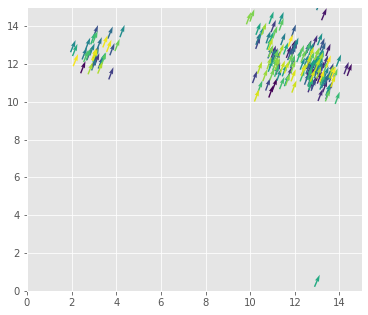

In [6]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # variance of noise
T = 1000  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # the Vicsek order parameter
plt.figure(figsize=(6,24))

state = initialize(L,N)
for t in range(T):
    eta = Noise_generator.rvs(N) # noise term
    state = update(state, L, N, v0, R, eta)
    opara[t] = order_para(state,N)
    #Initial tests：999 ，3999，6999，9999
    i = 1
    if (t-999)%3000 == 0:
        plt.subplot(4,1,i)
        i += 1
        plt.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.show()

Now for $T=10,000$ steps, we plot the Vicsek order paramater (as calculated in the above cell) against the time. 

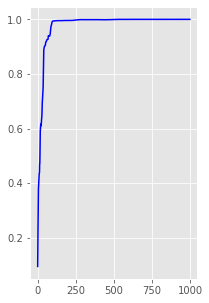

In [7]:
plt.figure(figsize=(3,5))
plt.plot(np.arange(T),opara,'b')    
plt.show()

We use these images as produced above at a variety of time steps to create an animation of the birds' motion for 1000 steps. 

FileNotFoundError: [Errno 2] No such file or directory: 'pics/0.png'

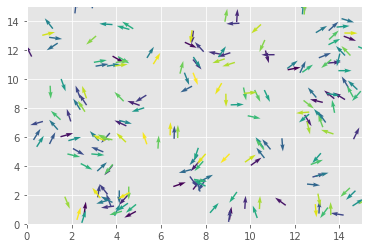

In [8]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # variance of noise
T = 10000  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # the Vicsek order parameter

state = initialize(L,N)
for t in range(T):
    eta = Noise_generator.rvs(N) # noise term
    state = update(state, L, N, v0, R, eta)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
    ax.set_xlim(0,15)
    ax.set_ylim(0,15)
    fig.savefig('pics/{}.png'.format(t))
    plt.close(fig)





In [9]:
# make a video
import cv2
import numpy as np

T = 1000
img_array = []
for i in range(T):
    #img = cv2.imread(filename)
    img = cv2.imread('pics/{}.png'.format(i))
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

 
 
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'FMP4'), 12, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
%timeit main(L,N,10)

NameError: name 'main' is not defined

In [11]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # variance of noise
T = 10000  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # the Vicsek order parame

import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        


def main(L,N,T):
    state = initialize(L,N)
    createFolder('./pics/')
    for t in range(T):
        eta = Noise_generator.rvs(N) # noise term
        state = update(state, L, N, v0, R, eta)
        #opara[t] = order_para(state,N)
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        ax.set_xlim(0,15)
        ax.set_ylim(0,15)
        fig.savefig('pics/{}.png'.format(t))
        plt.close(fig)

# Part 5

We are now going to compute a $n(\sigma)$ phase transition plot. The parameters we use are:

In [12]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
T = 500  # total time steps

The function we use to calculate $n(\sigma)$ is below. It is calculated by _______________ explanation here _________ .

In [13]:
def cal_n_sigma(L,N,T,sigma):
    Noise_generator = stats.norm(0,sigma)
    opara = np.zeros(T) # the Vicsek order parame
    state = initialize(L,N)
    for t in range(T):
        eta = Noise_generator.rvs(N) # noise term
        state = update(state, L, N, v0, R, eta)
        opara[t] = order_para(state,N)
    return opara

d_sigma = 20
res = np.zeros((T,d_sigma))
i = 0
for sigma in np.linspace(0,0.6,d_sigma):
    opara = cal_n_sigma(L,N,T,sigma)
    res[:,i] = opara
    i += 1

import pandas as pd
df = pd.DataFrame(data=res,index=[i+1 for i in range(res.shape[0])],columns=[str(sigma) for sigma in np.linspace(0,0.6,d_sigma)])
df.to_csv('n_sigma.csv')

KeyboardInterrupt: 

# Part 6 

We use some functions as defined at the start here, includng importing the same packages, and our functions such as cal_pdist.

We begin by defining a function which returns the index of the predator and a vector of prey near the predator.

In [14]:
# return the prey_index and run_away_vector(r,theta) of the prey near the predator(point from the predator to the prey)
def object_prey(prey, predator, R_predator, R_run_away, N):
    prey_index = []
    run_away_vector = []
    R = max(R_predator, R_run_away)
    
    for i in range(N):     
        t1 = 0
        t2 = 0
        dx = predator[0] - prey[i,0]
        dy = predator[1] - prey[i,1]
        if dx > L/2:
            t1 = -L
        if dx < -L/2:
            t1 = L
        if dy > L/2:
            t2 = -L
        if dy < -L/2:
            t2 = L    
        dist = np.sqrt((dx + t1)**2+(dy + t2)**2)
        if dist < R:
            prey_index.append(i)
            run_away_vector.append([dist, np.arctan2(- (dy + t2), - (dx + t1))])
                       
    return np.asarray(prey_index),np.asarray(run_away_vector)

Now we have to create an initial state for the birds and predator to begin in. These are defined as before using uniformly random distributions. 

In [15]:
# initialize the state of birds and predator
def initialize(L,N):
    # prey
    state = np.zeros((N,3))
    state[:,:2] = np.random.uniform(0,L,(N,2)) # positions x,y
    state[:,2] = np.random.uniform(0,2*np.pi,N) # angles theta
    # predator
    predator = np.zeros(3)
    predator[:2] = np.random.uniform(0,L,2)  # positions x,y
    predator[2] = np.random.uniform(0,2*np.pi,1)  # angles theta
    return state, predator

Then the function to update the orientation of the prey and predator at each discrete time step is:

In [16]:
# update the state of birds and predator in each time step
def update(state, predator, L, v0, v_predator, R, R_predator, R_run_away, Noise_generator): 
    N = np.shape(state)[0]   # number of birds left
                                       
    prey_index, run_away_vector = object_prey(state, predator, R_predator, R_run_away, N)
    potential_prey_index = np.argmin(run_away_vector[:,0])  # the index of the bird nearest to the predator
    # if the distance between the nearest bird and the predator is less then (v_predator-v0)/2, then it is eaten
    if run_away_vector[potential_prey_index,0] < (v_predator-v0): 
        state = np.delete(state, prey_index[potential_prey_index], axis=0)  # delete the dead bird
        # index of all the birds after the dead bird decrease by 1
        prey_index[potential_prey_index:] -= 1
        prey_index = np.delete(prey_index, potential_prey_index, axis=0) 
        run_away_vector = np.delete(run_away_vector, potential_prey_index, axis=0)
        N = N-1   # number of birds left decrease by 1            
        
    # Initialise heading
    heading = np.zeros(N)
    
    # Use adjacency matrix to determine neighbours
    A = cal_pdist(state[:,:2],N,L)
    
    for i in range(N):
        adj = np.where(A[i,:] < R)[0] # indices of adjacent particles
        theta = state[adj,2] # angles of all adjacent particles
        
        # Sum sin and cos of angles
        sum_sin = np.sum(np.sin(theta))
        sum_cos = np.sum(np.cos(theta))
        
        # Compute heading for this particle
        heading[i] = np.arctan2(sum_sin, sum_cos)
    
                 
    tmp = np.where(run_away_vector[:,0] < R_run_away)[0]
    run_away_prey = prey_index[tmp]
    sum_sin = - np.log(run_away_vector[tmp,0]/R_run_away)*np.sin(run_away_vector[tmp,1]) + np.sin(heading[run_away_prey])
    sum_cos = - np.log(run_away_vector[tmp,0]/R_run_away)*np.cos(run_away_vector[tmp,1]) + np.cos(heading[run_away_prey])
    heading[run_away_prey] = np.arctan2(sum_sin, sum_cos)
                       
    run_after_prey = np.where(run_away_vector[:,0] < R_predator)[0]
    sum_sin = - np.sum(np.log(run_away_vector[run_after_prey,0]/R_predator)*np.sin(run_away_vector[run_after_prey,1]))       
    sum_cos = - np.sum(np.log(run_away_vector[run_after_prey,0]/R_predator)*np.cos(run_away_vector[run_after_prey,1]))
    predator[2] = np.arctan2(sum_sin, sum_cos)

    # Update state with new headings
    state[:,2] = heading + Noise_generator.rvs(N)
    # Update positions(mod L)
    state[:,0] = (state[:,0] + v0*np.cos(state[:,2]))%L
    state[:,1] = (state[:,1] + v0*np.sin(state[:,2]))%L
    
    # Update predator with new headings
    predator[2] += Noise_generator.rvs(1)  
    # Update predator positions(mod L)
    predator[0] = (predator[0] + v_predator*np.cos(predator[2]))%L
    predator[1] = (predator[1] + v_predator*np.sin(predator[2]))%L
    return state, predator

We now create plots of our birds movement at different time steps and save these.

FileNotFoundError: [Errno 2] No such file or directory: 'pics/0.png'

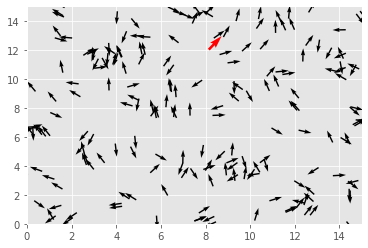

In [17]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
v_predator = 0.6 # the constant velocity of the preditor per time step
R = 1 # radius within which to search for neighbours
R_predator = 3.5 # radius within which to catch the preys
R_run_away = R_predator + 0.5  # radius within which the prey spot the predator and try to run away
sigma = 0.01  # variance of noise
T = 300  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # initialise the Vicsek order parameter

state, predator = initialize(L,N)
for t in range(T):
    state, predator = update(state, predator, L, v0, v_predator, R, R_predator, R_run_away, Noise_generator)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),color='k') 
    ax.quiver(predator[0],predator[1],np.cos(predator[2]),np.sin(predator[2]),color='r')
    ax.set_xlim(0,15)
    ax.set_ylim(0,15)
    fig.savefig('pics/{}.png'.format(t))
    plt.close(fig)

We now use cv2 and the plots produced to form an animation of the swarming behaviour of the birds when there is a predator present. 

In [18]:
# make a video
import cv2
import numpy as np

T = 300
img_array = []
for i in range(T):
    #img = cv2.imread(filename)
    img = cv2.imread('pics/{}.png'.format(i))
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

 
 
out = cv2.VideoWriter('eat.mp4',cv2.VideoWriter_fourcc(*'FMP4'), 12, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

AttributeError: 'NoneType' object has no attribute 'shape'